**Refer:**

- https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
- [dataset](https://github.com/zalandoresearch/fashion-mnist)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist


# Load Data

In [22]:
# load data
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

print("Training data shape", train_X.shape, train_Y.shape)
print("Testing data shape", test_X.shape, test_Y.shape)

Training data shape (60000, 28, 28) (60000,)
Testing data shape (10000, 28, 28) (10000,)


# Analyse Data

In [23]:
classes = np.unique(train_Y)
n_classes = len(classes)

print("Total output classes: ", n_classes)
print("Output classes: ", classes)

Total output classes:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


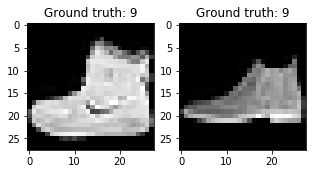

In [24]:
# show dataset: 1st image in training dataset and 1st image in testing dataset
plt.figure(figsize=(5,5))

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground truth: {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground truth: {}".format(test_Y[0]))

plt.show()

# Data Preprocessing

In [25]:
# why
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
# why
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255


In [27]:
train_Y_onehot = to_categorical(train_Y)
test_Y_onehot = to_categorical(test_Y)

print("Origin label: ", train_Y[0])
print("One hot label: ", train_Y_onehot[0])

Origin label:  9
One hot label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [28]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y_onehot, 
                                                      test_size=0.2, random_state=13)

train_X.shape, valid_X.shape, train_Y.shape, valid_Y.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Model the Data

In [29]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [30]:
batch_size = 64
epochs = 20
num_classes = 10

In [31]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


# Compile Model

In [32]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [33]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

# Train the Model

In [35]:
fashion_train = fashion_model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 134s 3ms/step - loss: 0.4673 - acc: 0.8279 - val_loss: 0.3204 - val_acc: 0.8875
Epoch 2/20
48000/48000 [==============================] - 129s 3ms/step - loss: 0.2892 - acc: 0.8940 - val_loss: 0.2926 - val_acc: 0.8942
Epoch 3/20
 3648/48000 [=>............................] - ETA: 2:13 - loss: 0.2486 - acc: 0.9090

KeyboardInterrupt: 